<a href="https://colab.research.google.com/github/coa-project/coabook/blob/master/using_pycoa_in_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

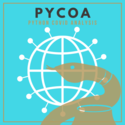

# Using PyCoA : advanced users
[ⓒpycoa.fr](https://pycoa.fr)

This notebook is designed for the v1.0 version of pycoa.

## Getting PyCoA, and initialisation

If you're under Google Colab, or if `pycoa` in not installed, you have to run the `pip install` command bellow.

In [ ]:
!pip install --quiet git+https://github.com/coa-project/pycoa.git # One may need to add the --user option at the "pip install" command, if it fails due to privilege lack. Under google colab, you must not add this option.
# You may experience few errors about datascience, coveralls, pytest versions, but pycoa will work.

     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 972kB 10.7MB/s 
     |████████████████████████████████| 10.1MB 25.7MB/s 
     |████████████████████████████████| 6.5MB 42.7MB/s 
     |████████████████████████████████| 245kB 51.1MB/s 
     |████████████████████████████████| 14.8MB 329kB/s 
     |████████████████████████████████| 235kB 48.8MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.


If `pycoa` is already installed on your system but is not in your path, you should specfiy it with the next lines (with the correct path); then please uncomment the second line.

In [ ]:
import sys
# sys.path.insert(1, '../pycoa')   # adapt the path for local install, if necessary. Under google colab, do not change anything

In [ ]:
import importlib
coa_module_info = importlib.util.find_spec("coa")
if coa_module_info == None:
  raise ModuleNotFoundError("The coa module is not found. Please check your install")

In [ ]:
import coa.tools as ct
ct._verbose_mode=2 # to get a more verbose output mode

In [ ]:
import coa
print(coa.__version__, coa.__author__ , coa.__email__ ) # print some informations
if coa.__version__ != 'v1.0':
  raise ImportError("The pycoa package version is incorrect. Expecting v1.0")

v1.0 Tristan Beau, Julien Browaeys, Olivier Dadoun support@pycoa.fr


In [ ]:
import coa.front as cf

Init of covid19.DataBase()
Init of GeoManager()
Init of GeoRegion()
JHU aka Johns Hopkins database selected ...
Few information concernant the selected database :  jhu
Available which key-words for:  ['deaths', 'confirmed', 'recovered']
Example of location :  Honduras, Indonesia, Western Sahara, Uruguay, Côte d'Ivoire  ...
Last date data  11/23/20
Init of CocoDisplay()
Init of GeoInfo()


## Some plots, with options

In [ ]:
cf.plot(where=['Spain'], which='deaths', what='cumul') # show bugs in data, because the cumulative function is not monotonous increasing

In [ ]:
cf.plot(where=['Spain'], which='deaths', what='cumul',option='nonneg') # show bugs in data, because the cumulative function is not monotonous increasing

In [ ]:
cf.plot(where=['Spain'], which='deaths', what='cumul',option='nonneg', when='15/03/2020:01/06/2020') # make a time selection

In [ ]:
cf.listwhat()

['cumul', 'diff', 'daily', 'weekly']

In [ ]:
# example with weekly
cf.plot(where=['USA','russia','india','brazil','france'],what='weekly',which='deaths')

In [ ]:
cf.listwhich()

['deaths', 'confirmed', 'recovered']

In [ ]:
cf.plot(where=['G7','Russia','China'],which='recovered',what='daily',option='nonneg') # example of interpret region (G7), which specified, what specified and non neg

## Getting the data value, plot them with another system or plot another computed values

In [ ]:
cf.listoutput() # for the list of output format for the get() function

['list', 'dict', 'array', 'pandas']

In [ ]:
data_array=cf.get(where='South america',which='deaths',output='array')   # this is a numpy array
data_array

array([[     0,      0,      0, ...,  36902,  37002,  37122],
       [     0,      0,      0, ...,   8904,   8907,   8916],
       [     0,      0,      0, ..., 168989, 169183, 169485],
       ...,
       [     0,      0,      0, ...,    116,    116,    116],
       [     0,      0,      0, ...,     69,     71,     71],
       [     0,      0,      0, ...,    869,    871,    873]])

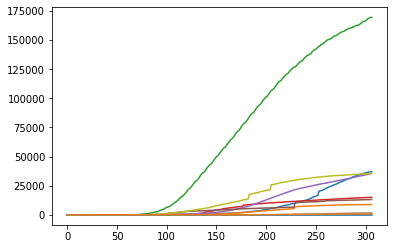

In [ ]:
import matplotlib
import numpy
matplotlib.pyplot.plot(numpy.transpose(data_array)) # plotting using matplotlib a numpy array

In [ ]:
data_france=cf.get(where='france',which='deaths',output='list',what='daily') # get values as list
type(data_france)

list

In [ ]:
data=cf.get(where='South america',which='deaths',output='pandas',what='daily')   # this is a numpy array
data

,where,date,deaths/cumul,daily,weekly
0,Guyana,2020-01-22,0,0,NaN
1,Guyana,2020-01-23,0,0,NaN
2,Guyana,2020-01-24,0,0,NaN
3,Guyana,2020-01-25,0,0,NaN
4,Guyana,2020-01-26,0,0,NaN
...,...,...,...,...,...
302,Peru,2020-11-19,35317,0,3.142857
303,Peru,2020-11-20,35446,129,3.142857
304,Peru,2020-11-21,35549,103,3.000000
305,Peru,2020-11-22,35549,0,2.857143


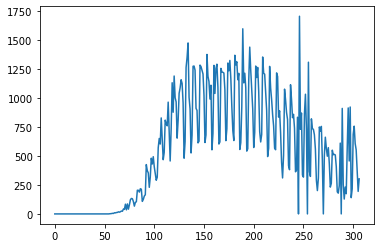

In [ ]:
data[data['where']=='Brazil']['daily'].plot() # using plot pandas.dataframe.plot() function which returns a matplotlib plot

## Now make another normalization of the data

In [ ]:
from coa.geo import GeoInfo as gi
g=gi()

Init of GeoInfo()
Init of GeoManager()
Init of GeoRegion()


In [ ]:
data_bis=g.add_field(input=data,field='population',geofield='where')
data_bis.tail()

,where,date,deaths/cumul,daily,weekly,population
3679,Peru,2020-11-19,35317,0,3.142857,32971854
3680,Peru,2020-11-20,35446,129,3.142857,32971854
3681,Peru,2020-11-21,35549,103,3.000000,32971854
3682,Peru,2020-11-22,35549,0,2.857143,32971854
3683,Peru,2020-11-23,35595,46,2.571429,32971854


In [ ]:
data_bis['deaths per 100k pop']=data_bis['deaths/cumul']/data_bis['population']*100000

In [ ]:
from bokeh.io import show
fig=cf._cocoplot.pycoa_date_plot(data_bis,input_names_data='deaths/cumul',title='deaths')   # use the coa.display module
show(fig)

In [ ]:
fig=cf._cocoplot.pycoa_date_plot(data_bis,input_names_data='deaths per 100k pop',title='deaths per 100k pop') # with normalization
show(fig)

## More about maps

In [ ]:
cf._cocoplot.return_map(data)

In [ ]:
cf._cocoplot.return_map(data_bis,which_data='deaths per 100k pop')   # mapping a specified field

## Exporting the data

In [ ]:
z=cf.get(where=['usa'], what='daily', which='recovered',output='pandas')
z.tail()

,where,date,recovered/cumul,daily,weekly
302,United States,2020-11-19,4410709,59920,51350.428571
303,United States,2020-11-20,4457930,47221,51826.285714
304,United States,2020-11-21,4529700,71770,54465.142857
305,United States,2020-11-22,4526513,-3187,50232.714286
306,United States,2020-11-23,4633600,107087,55541.285714


In [ ]:
z.to_csv('data_from_usa.csv')

In [ ]:
!ls

data_from_usa.csv  sample_data


In [ ]:
# Nota : you will get the data exploring the files (see menu on the left, lower button "Files")